#### Q1
Explain the concept of batch normalization in the context of Artificial Neural Networks
#### Ans
Batch normalization is a technique used in artificial neural networks to normalize the inputs of a layer by adjusting and scaling them. It involves normalizing the activations of a mini-batch of training examples within a layer.  
By normalizing the inputs, batch normalization helps in reducing the internal covariate shift, which is the change in the distribution of network activations as the parameters of the preceding layers are updated during training. This helps stabilize the training process and allows for faster convergence.

#### Q2
Describe the benefits of using batch normalization during training.
#### Ans
* Improved training speed: Batch normalization helps accelerate the training process by reducing the internal covariate shift. It helps the network converge faster and requires fewer training iterations.
* Better gradient flow: By normalizing the inputs within a mini-batch, batch normalization helps maintain a stable gradient flow. This results in more stable and efficient weight updates during backpropagation.
* Increased stability: Batch normalization adds a regularization effect, reducing the reliance on carefully tuned learning rates. It helps stabilize the network by preventing extreme activations or gradients.
* Reduced sensitivity to weight initialization: Batch normalization reduces the dependence on precise weight initialization. It allows the network to be less sensitive to the choice of initial weights, making it easier to train deep neural networks.

#### Q3
Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.
#### Ans
Batch normalization works by normalizing the activations of a neural network layer within a mini-batch during training. The working principle involves two key components: the normalization step and learnable parameters.

Normalization Step: In the normalization step, the mean and variance of the activations within a mini-batch are computed. The activations are then normalized by subtracting the mean and dividing by the standard deviation. This process ensures that the activations have zero mean and unit variance, reducing the impact of internal covariate shift.  
Learnable Parameters: Batch normalization has 2 learnable parameters, gamma (γ) and beta (β). These parameters allow the network to adaptively scale and shift the normalized activations. The scaling parameter (γ) controls the amplification of the normalized values, while the shifting parameter (β) controls the bias or offset.

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
print(f'tensorflow version {tf.__version__}')
print(f'tensorflow version {tf.keras.__version__}')

tensorflow version 2.12.0
tensorflow version 2.12.0


In [3]:
(X_train_full,y_train_full),(X_test_full,y_test_full)=tf.keras.datasets.cifar10.load_data()
X_train_full.shape,y_train_full.shape,X_test_full.shape,y_test_full.shape

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

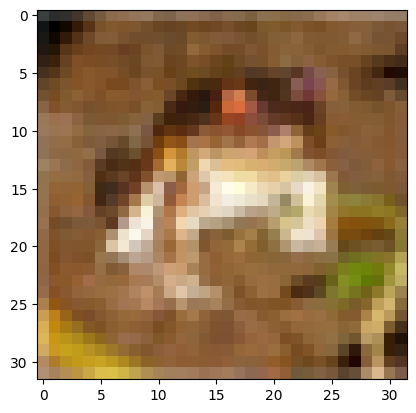

In [4]:
# performed scaling of the dataset
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test_full=X_test_full/255.

plt.imshow(X_train_full[0],cmap='binary')

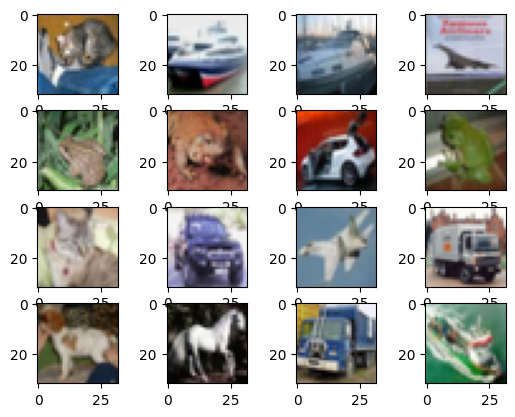

In [18]:
# from scipy.misc import toimage
import matplotlib.pyplot as plt
import matplotlib

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(X[k],cmap='binary')
            k = k+1
    # show the plot
    plt.show()

show_imgs(X_test_full[:16])

In [6]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
Layers=[    tf.keras.layers.Flatten(input_shape=[32, 32, 3],name='InputLayer'),
            tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
            tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
            tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
        ]
model_clf=tf.keras.models.Sequential(Layers)
model_clf.layers

In [31]:
model_clf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 3072)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               921900    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [32]:
loss_function,metrics='sparse_categorical_crossentropy','accuracy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_clf.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [33]:
epochs=30
validation_set=(X_valid,y_valid)
start=time.time()
history_init=model_clf.fit(X_train,y_train,validation_data=validation_set,batch_size=32,epochs=15)
end=time.time()
print(f'the time taken for this program to run is {end-start}')

Epoch 1/15
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8817 - accuracy: 0.3223 - val_loss: 1.7650 - val_accuracy: 0.3738
Epoch 2/15
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7047 - accuracy: 0.3882 - val_loss: 1.6844 - val_accuracy: 0.4008
Epoch 3/15
1407/1407 [==============================] - 26s 18ms/step - loss: 1.6297 - accuracy: 0.4171 - val_loss: 1.6363 - val_accuracy: 0.4100
Epoch 4/15
1407/1407 [==============================] - 28s 20ms/step - loss: 1.5787 - accuracy: 0.4359 - val_loss: 1.5694 - val_accuracy: 0.4372
Epoch 5/15
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5370 - accuracy: 0.4496 - val_loss: 1.5557 - val_accuracy: 0.4436
Epoch 6/15
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5060 - accuracy: 0.4628 - val_loss: 1.5313 - val_accuracy: 0.4602
Epoch 7/15
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4806 - accuracy: 0.4732 - val_loss: 1.5347 -

In [12]:
res_init=pd.DataFrame(history_init.history)
res_init

,loss,accuracy,val_loss,val_accuracy
0,1.350344,0.516756,1.453222,0.4796
1,1.341781,0.519222,1.442480,0.4916
2,1.337460,0.521044,1.454580,0.4864
3,1.329033,0.526400,1.483207,0.4766
4,1.321324,0.525000,1.480179,0.4788
5,1.317371,0.528844,1.483716,0.4818
6,1.308228,0.535400,1.482297,0.4818
7,1.303200,0.533867,1.494636,0.4762
8,1.300987,0.534600,1.476119,0.4834
9,1.289863,0.539200,1.501558,0.4836


<Axes: >

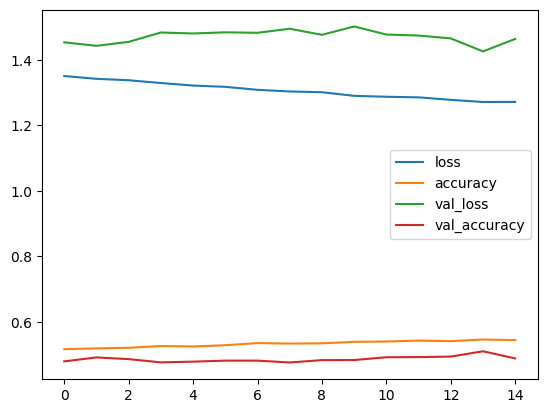

In [15]:
res_init.plot()

In [16]:
test_loss, test_accuracy = model_clf.evaluate(X_test_full, y_test_full)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.4675 - accuracy: 0.4847
Test Loss: 1.467515468597412
Test Accuracy: 0.4846999943256378


USING BATCH NORMALISATION

In [26]:
# del model_clf
layersBN=[  tf.keras.layers.Flatten(input_shape=[32, 32, 3],name='InputLayer'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
        ]
model_BN=tf.keras.models.Sequential(layersBN)

In [28]:
import time
model_BN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start=time.time()
history=model_BN.fit(X_train,y_train,batch_size=32,epochs=15,validation_data=(X_valid,y_valid),verbose=2)
end=time.time()
print(f'the time taken for this program to run is {end-start}')

Epoch 1/15
1407/1407 - 28s - loss: 1.6429 - accuracy: 0.4155 - val_loss: 1.4786 - val_accuracy: 0.4734 - 28s/epoch - 20ms/step
Epoch 2/15
1407/1407 - 34s - loss: 1.4703 - accuracy: 0.4771 - val_loss: 1.4047 - val_accuracy: 0.5004 - 34s/epoch - 24ms/step
Epoch 3/15
1407/1407 - 28s - loss: 1.3847 - accuracy: 0.5074 - val_loss: 1.3757 - val_accuracy: 0.5188 - 28s/epoch - 20ms/step
Epoch 4/15
1407/1407 - 28s - loss: 1.3181 - accuracy: 0.5336 - val_loss: 1.3482 - val_accuracy: 0.5260 - 28s/epoch - 20ms/step
Epoch 5/15
1407/1407 - 25s - loss: 1.2678 - accuracy: 0.5483 - val_loss: 1.3112 - val_accuracy: 0.5400 - 25s/epoch - 18ms/step
Epoch 6/15
1407/1407 - 26s - loss: 1.2169 - accuracy: 0.5654 - val_loss: 1.3082 - val_accuracy: 0.5426 - 26s/epoch - 18ms/step
Epoch 7/15
1407/1407 - 26s - loss: 1.1762 - accuracy: 0.5833 - val_loss: 1.2840 - val_accuracy: 0.5494 - 26s/epoch - 18ms/step
Epoch 8/15
1407/1407 - 25s - loss: 1.1383 - accuracy: 0.5967 - val_loss: 1.2987 - val_accuracy: 0.5436 - 25s/ep

<Axes: >

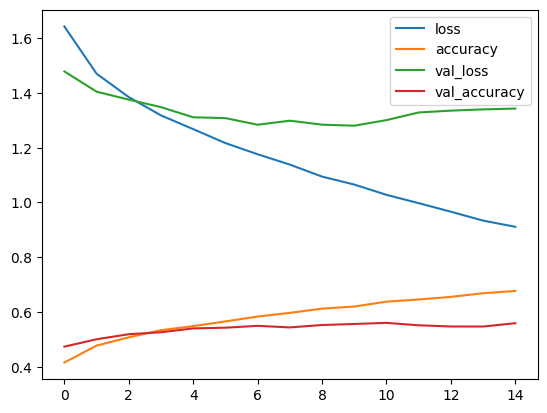

In [34]:
res=pd.DataFrame(history.history)
res.plot()

In [35]:
test_loss, test_accuracy = model_clf.evaluate(X_test_full, y_test_full)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.4683 - accuracy: 0.4852
Test Loss: 1.4682888984680176
Test Accuracy: 0.4851999878883362


                          *IMPACT OF BATCH NORMALISATION*
Batch normalization has an impact on the training process and the performance of a neural network :

* Improved training speed: Batch normalization accelerates the training process by reducing the internal covariate shift. It helps the network converge faster.

* Enhanced training stability: Batch normalization adds a regularization effect, reducing the network's sensitivity to the choice of learning rate and weight initialization.

* Increased learning capacity: Batch normalization allows for higher learning rates to be used without causing instability.

* Better generalization: By normalizing the activations within each mini-batch, batch normalization reduces overfitting. We have also observed from the graphs above that after applying Batch Normalisation, the accuracy of both the train and validation data increased with each passing epoch

EXPERIMENTATION SECTION

In [37]:
del model_BN
layersBN=[  tf.keras.layers.Flatten(input_shape=[32, 32, 3],name='InputLayer'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
        ]
model_BN2=tf.keras.models.Sequential(layersBN)

Taking the batch size as 16

In [38]:
import time
model_BN2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start=time.time()
history=model_BN2.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_valid,y_valid),verbose=2)
end=time.time()
print(f'the time taken for this program to run is {end-start}')

Epoch 1/10
2813/2813 - 49s - loss: 1.7723 - accuracy: 0.3700 - val_loss: 1.5514 - val_accuracy: 0.4464 - 49s/epoch - 18ms/step
Epoch 2/10
2813/2813 - 46s - loss: 1.5924 - accuracy: 0.4332 - val_loss: 1.4553 - val_accuracy: 0.4828 - 46s/epoch - 16ms/step
Epoch 3/10
2813/2813 - 55s - loss: 1.5096 - accuracy: 0.4603 - val_loss: 1.4051 - val_accuracy: 0.5000 - 55s/epoch - 20ms/step
Epoch 4/10
2813/2813 - 44s - loss: 1.4544 - accuracy: 0.4849 - val_loss: 1.3641 - val_accuracy: 0.5158 - 44s/epoch - 16ms/step
Epoch 5/10
2813/2813 - 42s - loss: 1.4036 - accuracy: 0.5041 - val_loss: 1.3438 - val_accuracy: 0.5336 - 42s/epoch - 15ms/step
Epoch 6/10
2813/2813 - 45s - loss: 1.3617 - accuracy: 0.5188 - val_loss: 1.3064 - val_accuracy: 0.5418 - 45s/epoch - 16ms/step
Epoch 7/10
2813/2813 - 44s - loss: 1.3238 - accuracy: 0.5306 - val_loss: 1.3006 - val_accuracy: 0.5406 - 44s/epoch - 16ms/step
Epoch 8/10
2813/2813 - 43s - loss: 1.2920 - accuracy: 0.5406 - val_loss: 1.3136 - val_accuracy: 0.5436 - 43s/ep

<Axes: >

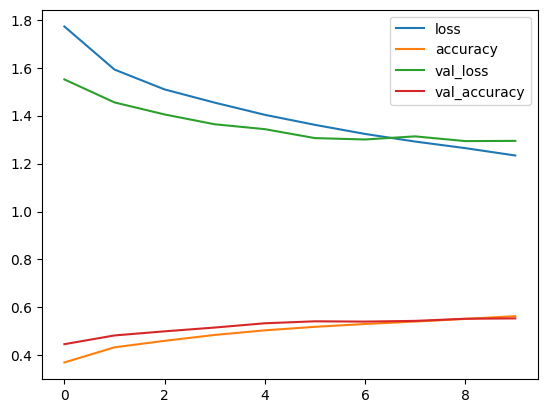

In [39]:
pd.DataFrame(history.history).plot()

Using Batch size as 128

In [40]:
import time
model_BN2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start=time.time()
history=model_BN2.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_valid,y_valid),verbose=2)
end=time.time()
print(f'the time taken for this program to run is {end-start}')

Epoch 1/10
352/352 - 14s - loss: 0.9574 - accuracy: 0.6641 - val_loss: 1.2513 - val_accuracy: 0.5690 - 14s/epoch - 40ms/step
Epoch 2/10
352/352 - 12s - loss: 0.8884 - accuracy: 0.6878 - val_loss: 1.2837 - val_accuracy: 0.5654 - 12s/epoch - 34ms/step
Epoch 3/10
352/352 - 13s - loss: 0.8385 - accuracy: 0.7041 - val_loss: 1.2941 - val_accuracy: 0.5630 - 13s/epoch - 37ms/step
Epoch 4/10
352/352 - 13s - loss: 0.7973 - accuracy: 0.7178 - val_loss: 1.3267 - val_accuracy: 0.5680 - 13s/epoch - 37ms/step
Epoch 5/10
352/352 - 12s - loss: 0.7561 - accuracy: 0.7337 - val_loss: 1.3630 - val_accuracy: 0.5548 - 12s/epoch - 33ms/step
Epoch 6/10
352/352 - 11s - loss: 0.7155 - accuracy: 0.7471 - val_loss: 1.3920 - val_accuracy: 0.5620 - 11s/epoch - 33ms/step
Epoch 7/10
352/352 - 12s - loss: 0.6777 - accuracy: 0.7618 - val_loss: 1.4281 - val_accuracy: 0.5578 - 12s/epoch - 35ms/step
Epoch 8/10
352/352 - 12s - loss: 0.6416 - accuracy: 0.7746 - val_loss: 1.4565 - val_accuracy: 0.5608 - 12s/epoch - 35ms/step


<Axes: >

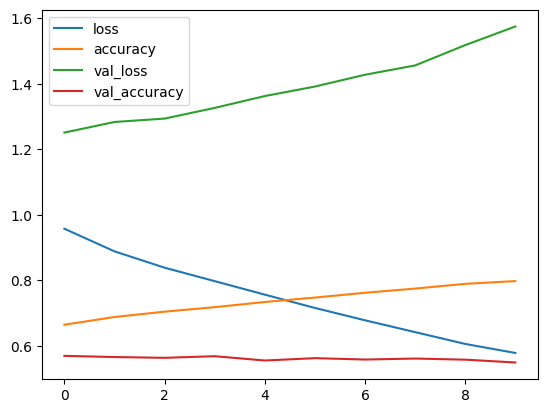

In [41]:
pd.DataFrame(history.history).plot()

We can clearly observe that with increase in the Batch size, the convergence time and performance of the algorithm, in terms of increased accuracy has improved

NOW, we use a LARGE BATCH SIZE AND LARGE LEARNING RATE

In [42]:
import time
model_BN2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start=time.time()
history=model_BN2.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_valid,y_valid),verbose=2)
end=time.time()
print(f'the time taken for this program to run is {end-start}')

Epoch 1/10
352/352 - 14s - loss: 1.8231 - accuracy: 0.3615 - val_loss: 1.8487 - val_accuracy: 0.3974 - 14s/epoch - 41ms/step
Epoch 2/10
352/352 - 12s - loss: 1.6013 - accuracy: 0.4298 - val_loss: 1.8803 - val_accuracy: 0.4024 - 12s/epoch - 35ms/step
Epoch 3/10
352/352 - 14s - loss: 1.5709 - accuracy: 0.4432 - val_loss: 1.7182 - val_accuracy: 0.4248 - 14s/epoch - 40ms/step
Epoch 4/10
352/352 - 12s - loss: 1.4875 - accuracy: 0.4703 - val_loss: 1.6084 - val_accuracy: 0.4658 - 12s/epoch - 34ms/step
Epoch 5/10
352/352 - 13s - loss: 1.4377 - accuracy: 0.4902 - val_loss: 1.6256 - val_accuracy: 0.4432 - 13s/epoch - 36ms/step
Epoch 6/10
352/352 - 12s - loss: 1.5057 - accuracy: 0.4665 - val_loss: 1.6165 - val_accuracy: 0.4506 - 12s/epoch - 34ms/step
Epoch 7/10
352/352 - 12s - loss: 1.4043 - accuracy: 0.4991 - val_loss: 1.5790 - val_accuracy: 0.4690 - 12s/epoch - 34ms/step
Epoch 8/10
352/352 - 11s - loss: 1.3632 - accuracy: 0.5173 - val_loss: 1.6452 - val_accuracy: 0.4724 - 11s/epoch - 32ms/step


<Axes: >

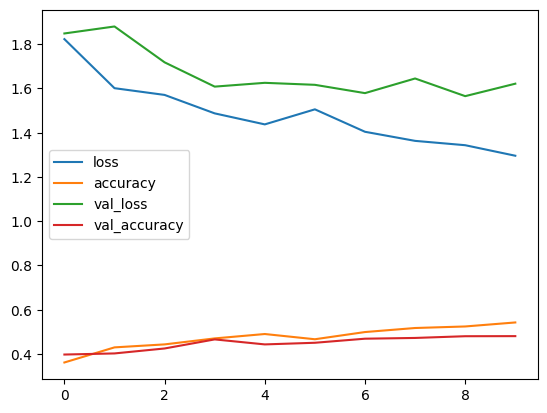

In [43]:
pd.DataFrame(history.history).plot()

With increasing the learning rate, we have seen that the training is not stable(from the graph) as the plot is haphazard. When the rate was small, the training took more time.

#### Q.2
Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks
#### Ans
Advantages of Batch Normalization:

* Improved training speed: Batch normalization helps neural networks converge faster by reducing internal covariate shift.

* Better gradient flow: Batch normalization mitigates the vanishing and exploding gradient problems by ensuring that the gradients flow through the network more smoothly.

* Regularization effect: Batch normalization acts as a regularizer by adding noise to the network through the mini-batch statistics. This helps reduce overfitting, improving the model's ability to generalize to unseen data.

Potential Limitations of Batch Normalization:

* Increased computational complexity: Batch normalization adds computational overhead during training as it requires computing and normalizing mini-batch statistics.

* Sensitivity to learning rate: Batch normalization can be sensitive to the learning rate choice. Very high learning rates may result in unstable training, while very low learning rates may lead to slower convergence.
